In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("2008_swing_states.csv")

In [24]:
df.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        222 non-null    object 
 1   county       222 non-null    object 
 2   total_votes  222 non-null    int64  
 3   dem_votes    222 non-null    int64  
 4   rep_votes    222 non-null    int64  
 5   dem_share    222 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 10.5+ KB


In [26]:
df.describe()

,total_votes,dem_votes,rep_votes,dem_share
count,222.000000,222.000000,222.000000,222.000000
mean,90424.513514,47214.283784,42236.567568,43.764414
std,142285.290653,88913.077046,56208.862490,10.712770
min,2245.000000,642.000000,1323.000000,6.800000
25%,16537.250000,6337.500000,9203.750000,37.302500
50%,32491.000000,14392.000000,18050.500000,43.185000
75%,95516.750000,41623.000000,50651.750000,49.925000
max,863486.000000,595980.000000,360551.000000,83.560000


In [27]:
df_states = pd.read_csv("2008_all_states.csv")

In [28]:
df_states.describe()

,total_votes,dem_votes,rep_votes,other_votes,dem_share
count,3.153000e+03,3.153000e+03,3153.000000,3153.000000,3153.000000
mean,4.171013e+04,2.206070e+04,19019.719632,582.779258,42.214653
std,1.192757e+05,7.668304e+04,44604.561162,1834.898291,14.046978
min,7.900000e+01,8.000000e+00,67.000000,0.000000,5.030000
25%,5.015000e+03,1.832000e+03,2889.000000,71.000000,31.980000
50%,1.086800e+04,4.434000e+03,6270.000000,171.000000,41.770000
75%,2.856200e+04,1.209400e+04,15775.000000,434.000000,51.280000
max,3.318248e+06,2.295853e+06,956425.000000,65970.000000,93.430000


In [29]:
df_states.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


In [37]:
pa_votes = df[df['state']=='PA'][['state','dem_share']]

In [44]:
print(pa_votes.dem_share.mean()) # affected by out liers
print(pa_votes.dem_share.median()) # immune to outliers

45.476417910447765
44.03


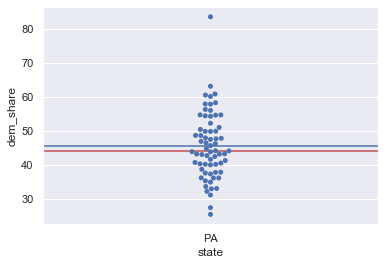

In [45]:
sns.set()
p = sns.swarmplot(x='state',y='dem_share',data=pa_votes)
p.axhline(pa_votes.dem_share.mean())
p.axhline(pa_votes.dem_share.median(),color='r')


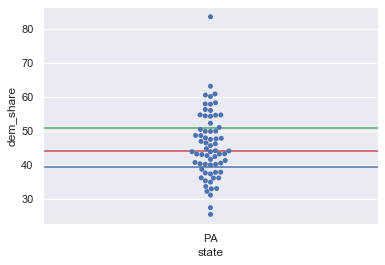

In [48]:
# The median is another name for the 50th percentile
# The 50th percentile is the data point that is greater than 50% of the data
percentiles = np.percentile(pa_votes.dem_share, [25, 50, 75])
p = sns.swarmplot(x='state', y='dem_share', data=pa_votes)
p.axhline(percentiles[0], color='b')
p.axhline(percentiles[1], color='r')
p.axhline(percentiles[2], color='g')

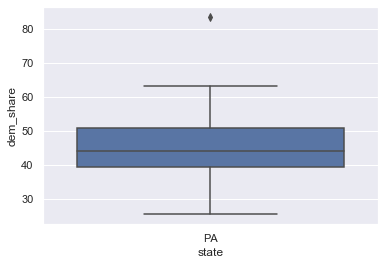

In [50]:
# Box plots are better to visualize percentiles
p = sns.boxplot(x = 'state', y='dem_share', data=pa_votes)
# The line in the middle is the 50th percentile
# The top and bottom lines of the box are the 75th and the 25th percentiles
# The difference between the 25 and the 75th is called the Inter Quartile Range
# IQR = [75th - 25th]
# The whiskers (the top and bottom lines) extend up to 1.5 IQR
# Any data point above or below the whiskers is plotted as an individual point
# Such points are considered outliers

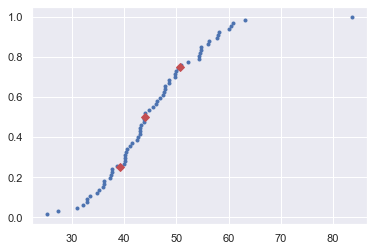

In [57]:
import MyLib as my
x, y = my.ECDF(pa_votes.dem_share)
_ = plt.plot(x, y, marker='.', linestyle='none')
ptile_vals = np.array([25, 50, 75])
ptiles = np.percentile(pa_votes.dem_share, ptile_vals)
_ = plt.plot(ptiles, ptile_vals/100, marker='D', linestyle='none', color='r')


In [63]:
# The varience = average of the squared distances from the mean
# A measure of spread
print(np.var(pa_votes.dem_share)) # population varience
print(pa_votes.dem_share.var()) # sample varience

# In the sample varience we divide by (n-1) not n
# This is called the Bessel's Correction
# To find the population varience using pd.var(), set ddof to 1
# ddof stands for Delta Degrees Of Freedom
print(pa_votes.dem_share.var(ddof=0))

94.66503492982848
96.09935364088649
94.66503492982848


In [68]:
# The varience is squared ==> it does not have the same units as the data
# The standard deviation is the sqaure root of the varience
print(np.std(pa_votes.dem_share))
print(np.sqrt(np.var(pa_votes.dem_share)))
print(pa_votes.dem_share.std(ddof = 0))

9.729595825615187
9.729595825615187
9.729595825615187
